In [1]:
import os 
import re
import matplotlib.pyplot as plt
import rmgpy.chemkin
import numpy as np
import cantera as ct
import pandas as pd
%matplotlib inline



In [2]:
def load_chemkin_file(path): 
    """ 
    Load Chemkin file and extract the reactions and species.
    Path should be the path to the species folder.
    """
    
    full_path = os.path.join(path,'chemkin')
    chemkin_path = os.path.join(full_path,'copies', 'copy_chem_annotated.inp')
   # chemkin_path = os.path.join(full_path,'chem_annotated.inp')
    dictionary_path = os.path.join(full_path,'species_dictionary.txt')
    transport_path = os.path.join(full_path,'tran.dat')

    species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(chemkin_path, dictionary_path=dictionary_path, transport_path=transport_path)

    return species_list, reaction_list

## Plot Sensitivity

In [9]:
#we want to focus on the top ___ most sensitive reactions 
n = 10 #len(reaction_list)

In [3]:
def plot_sensitivity(csv_file):
    ############ plotting stuff

    df = pd.read_csv(f'./{csv_file}')

    match = re.search('(\S+)_RMG_sensitivities.csv', file)
    blend = match.group(1)

    fig, ax = plt.subplots()

    plt.xlabel('Sensitivity')
    plt.title(f"Sensitivity for {blend} Model at Refrigerant Volume Fraction with Max Flame Speed%")

    ############# iterate over rows of csv file. 

    for index,row in df.head(n).iterrows(): #Only iterate over the first n rows


        sensitivity, ct_equation, = row['sensitivity'], row['cantera equation']
        ax.barh(ct_equation, sensitivity, color='b', align='center')


NameError: name 'n' is not defined

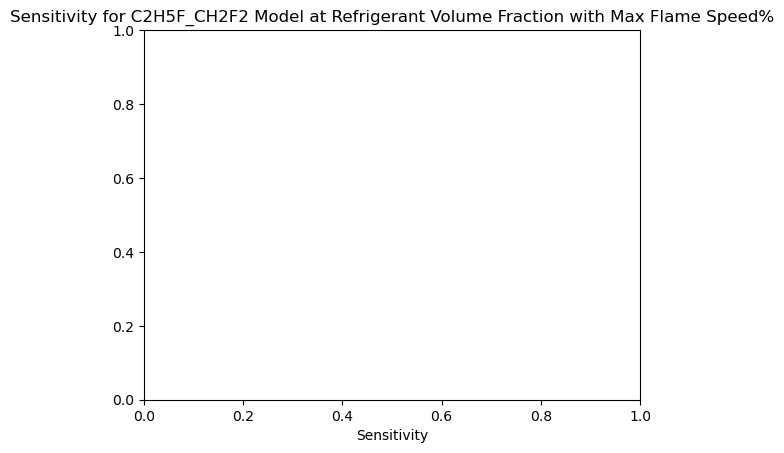

In [4]:
list_of_csvs = [file for file in os.listdir('.') if re.search('\.csv', file)]

for file in list_of_csvs: 
    plot_sensitivity(file)